#### Project 4

In [1]:
# uv export --no-hashes > requirements.txt
print("notebook ok")

notebook ok


In [3]:
from research_and_analyst.utils.model_loader import ModelLoader

In [4]:
model_loader = ModelLoader()

{"timestamp": "2025-10-17T09:43:32.781909Z", "level": "info", "event": "GOOGLE_API_KEY loaded from environment"}
{"timestamp": "2025-10-17T09:43:32.791385Z", "level": "info", "event": "GROQ_API_KEY loaded from environment"}
{"timestamp": "2025-10-17T09:43:32.799777Z", "level": "warning", "event": "ASTRA_DB_API_ENDPOINT is missing from environment"}
{"timestamp": "2025-10-17T09:43:32.811552Z", "level": "warning", "event": "ASTRA_DB_APPLICATION_TOKEN is missing from environment"}
{"timestamp": "2025-10-17T09:43:32.818741Z", "level": "warning", "event": "ASTRA_DB_KEYSPACE is missing from environment"}
{"config_keys": ["astra_db", "embedding_model", "retriever", "llm"], "timestamp": "2025-10-17T09:43:32.902834Z", "level": "info", "event": "YAML config loaded"}


In [5]:
llm = model_loader.load_llm()

{"provider": "groq", "model": "llama-3.3-70b-versatile", "timestamp": "2025-10-17T09:43:36.162164Z", "level": "info", "event": "Loading LLM"}


In [5]:
llm.invoke("Hello, how are you?")

HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"


AIMessage(content="Hello. I'm just a language model, so I don't have feelings or emotions like humans do, but I'm functioning properly and ready to assist you with any questions or tasks you may have. How can I help you today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 48, 'prompt_tokens': 41, 'total_tokens': 89, 'completion_time': 0.097114962, 'prompt_time': 0.00213851, 'queue_time': 0.09321595, 'total_time': 0.099253472}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_9e1e8f8435', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--a9601c56-9559-4bea-8e6a-639b82f9d6c4-0', usage_metadata={'input_tokens': 41, 'output_tokens': 48, 'total_tokens': 89})

In [20]:
from typing import List
from typing_extensions import TypedDict
from pydantic import BaseModel, Field

In [14]:
def human_feedback(state):
    """_summary_

    Args:
        state (_type_): _description_
    """
    pass

In [15]:
def create_analyst(state):
    """_summary_

    Args:
        state (_type_): _description_
    """
    pass

In [16]:
def should_continue(state):
    """_summary_

    Args:
        state (_type_): _description_
    """
    pass

In [21]:
from langgraph.graph import StateGraph, START, END
from langchain_core.messages import AIMessage, HumanMessage, SystemMessage
from langgraph.checkpoint.memory import MemorySaver

In [14]:
import operator
from typing import  Annotated
from langgraph.graph import MessagesState
class Analyst(BaseModel):
    """_summary_
    """
    name: str = Field(..., description="Name of the analyst")
    role: str = Field(..., description="Role of the analyst in the context of the topic")
    affiliation: str = Field(..., description="Primary affiliation of the analyst")
    description: str = Field(..., description="Description of the analyst focus, concerns, and motives")

    @property
    def persona(self) -> str:
        return f"Name: {self.name}\nRole: {self.role}\nAffiliation: {self.affiliation}\nDescription: {self.description}\n"

In [15]:
class Perspective(BaseModel):
    analysts: List[Analyst] = Field(..., description="Comprehensive list of analysts with their roles and affiliations.")

In [22]:
analyst = Analyst(
    name="klangat",
    role="Gen AI eng.",
    affiliation="OpenAI",
    description="Focus on building and deploying generative AI models."
)

In [23]:
analyst

Analyst(name='klangat', role='Gen AI eng.', affiliation='OpenAI', description='Focus on building and deploying generative AI models.')

In [24]:
print(analyst.persona)

Name: klangat
Role: Gen AI eng.
Affiliation: OpenAI
Description: Focus on building and deploying generative AI models.



In [25]:
analyst.role

'Gen AI eng.'

In [26]:
analyst.affiliation

'OpenAI'

In [27]:
class GenerateAnalystsState(TypedDict):
    """_summary_
    """
    topic: str
    max_analysts: int
    human_analyst_feedback: str
    analysts: List[Analyst]

In [28]:
GenerateAnalystsState(
    topic="AI in healthcare",
    max_analysts=5,
    human_analyst_feedback="give the real information",
)

{'topic': 'AI in healthcare',
 'max_analysts': 5,
 'human_analyst_feedback': 'give the real information'}

In [29]:
analyst_instructions = """You are tasked with creating a set of AI analyst personas. Follow these instructions carefully:

1. First, review the research topic:
{topic}
        
2. Examine any editorial feedback that has been optionally provided to guide creation of the analysts: 
        
{human_analyst_feedback}
    
3. Determine the most interesting themes based upon documents and / or feedback above.
                    
4. Pick the top {max_analysts} themes.

5. Assign one analyst to each theme."""

In [30]:
def create_analyst(state):
    """It is creating my analyst
    """
    topic = state["topic"]
    max_analysts = state["max_analysts"]
    human_analyst_feedback = state.get("human_analyst_feedback", "")

    structured_llm = llm.with_structured_output(Perspective)

    system_messages = analyst_instructions.format(
        topic=topic,
        max_analysts=max_analysts,
        human_analyst_feedback=human_analyst_feedback
    )

    analysts = structured_llm.invoke([SystemMessage(content=system_messages)] + [HumanMessage(content="Generate the set of analysts")])

    # write the list of analysis to state
    return{"analysts": analysts.analysts}

In [31]:
print([analyst_instructions.format(
    topic="AI in healthcare",
    max_analysts=4,
    human_analyst_feedback="please expalain only on AI"
)] + ["Generate the set of analysts."])

['You are tasked with creating a set of AI analyst personas. Follow these instructions carefully:\n\n1. First, review the research topic:\nAI in healthcare\n\n2. Examine any editorial feedback that has been optionally provided to guide creation of the analysts: \n\nplease expalain only on AI\n\n3. Determine the most interesting themes based upon documents and / or feedback above.\n\n4. Pick the top 4 themes.\n\n5. Assign one analyst to each theme.', 'Generate the set of analysts.']


In [32]:
create_analyst(
    {'topic': 'AI in healthcare',
    'max_analysts': 4,
    'human_analyst_feedback': 'give the real information'}
)

HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"


{'analysts': [Analyst(name='Dr. Rachel Kim', role='Healthcare Expert', affiliation='Harvard Medical School', description='Focus on AI applications in medical diagnosis and treatment, with concerns about data privacy and algorithmic bias.'),
  Analyst(name='Dr. Liam Chen', role='AI Researcher', affiliation='Stanford University', description='Examines the potential of AI in personalized medicine, with a focus on machine learning and natural language processing.'),
  Analyst(name='Dr. Ava Moreno', role='Ethics Specialist', affiliation='University of California, Berkeley', description='Investigates the ethical implications of AI in healthcare, including issues of patient autonomy and informed consent.'),
  Analyst(name='Dr. Julian Lee', role='Industry Consultant', affiliation='Deloitte', description='Analyzes the business and economic impact of AI on the healthcare industry, with a focus on cost savings and efficiency gains.')]}

In [33]:
def human_feedback(state):
    """ No op node that should be interrupted on """
    pass

In [34]:
def should_continue(state):
    """ summanry"""
    feedback = (state.get("human_analyst_feedback") or "").strip().lower()
    if feedback and feedback not in ["", "none", "no", "nope", "skip", "done", "continue"]:
        return "create_analyst"
    return END

In [35]:
from IPython.display import display, Markdown, Image

In [36]:
builder = StateGraph(GenerateAnalystsState)

In [37]:
builder.add_node("create_analyst", create_analyst)
builder.add_node("human_feedback", human_feedback)

In [38]:
builder.add_edge(START, "create_analyst")
builder.add_edge("create_analyst", "human_feedback")
builder.add_conditional_edges("human_feedback",
                               should_continue,
                               ["create_analyst",
                                END])

In [39]:
memory = MemorySaver()

In [40]:
graph = builder.compile(interrupt_before= ["human_feedback"], checkpointer=memory)

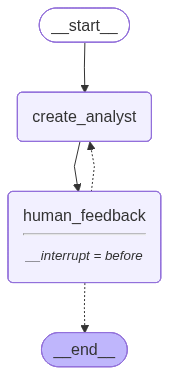

In [41]:
display(Image(graph.get_graph(xray=1).draw_mermaid_png()))

In [42]:
topic = "The benefits of adopting Langgraph as an agent Framework over Autogen"

In [43]:
max_analysts = 4
thread = {"configurable": {"thread_id": 1}}

In [44]:
for event in graph.stream({"topic":topic,
            "max_analysts":max_analysts},
            thread,
            stream_mode= "values"):
    analysts = event.get('analysts', '')

    if analysts:
        for analyst in analysts:
            print(f"Name: {analyst.name}")
            print(f"Role: {analyst.role}")
            print(f"Affiliation: {analyst.affiliation}")
            print(f"Description: {analyst.description}")
            print("-" * 50)

HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"


Name: Dr. Rachel Kim
Role: AI Researcher
Affiliation: Stanford University
Description: Expert in natural language processing and agent frameworks, focusing on the benefits of Langgraph's flexibility and customizability
--------------------------------------------------
Name: Dr. Liam Chen
Role: Software Engineer
Affiliation: Google
Description: Specialist in developing scalable and efficient systems, concerned with the performance and reliability of Autogen versus Langgraph
--------------------------------------------------
Name: Dr. Ava Moreno
Role: Cognitive Scientist
Affiliation: MIT
Description: Researcher in human-computer interaction and decision-making, interested in the potential of Langgraph to enhance user experience and decision-support
--------------------------------------------------
Name: Dr. Julian Lee
Role: Tech Consultant
Affiliation: Deloitte
Description: Advisor on technology adoption and integration, motivated by the cost-benefit analysis and return on investment o

In [45]:
state = graph.get_state(thread)

In [46]:
state

StateSnapshot(values={'topic': 'The benefits of adopting Langgraph as an agent Framework over Autogen', 'max_analysts': 4, 'analysts': [Analyst(name='Dr. Rachel Kim', role='AI Researcher', affiliation='Stanford University', description="Expert in natural language processing and agent frameworks, focusing on the benefits of Langgraph's flexibility and customizability"), Analyst(name='Dr. Liam Chen', role='Software Engineer', affiliation='Google', description='Specialist in developing scalable and efficient systems, concerned with the performance and reliability of Autogen versus Langgraph'), Analyst(name='Dr. Ava Moreno', role='Cognitive Scientist', affiliation='MIT', description='Researcher in human-computer interaction and decision-making, interested in the potential of Langgraph to enhance user experience and decision-support'), Analyst(name='Dr. Julian Lee', role='Tech Consultant', affiliation='Deloitte', description='Advisor on technology adoption and integration, motivated by the 

In [47]:
# Check attribute- next
state.next

('human_feedback',)

In [48]:
graph.update_state(thread,
                   {"human_analyst_feedback": "add some start up perspective and focus on latest enterprise application."}, as_node="human_feedback"
                   )

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0ab41b-4c23-6cb2-8002-07f8f9a70df0'}}

In [49]:
# If we are satisfied, then we simply supply no feedback
further_feedback = ""

In [50]:
# 1) Get the latest state (you're paused at 'human_feedback')
state = graph.get_state(thread)

# 2) Use the exact config from that state (it already has thread_id, checkpoint_ns, checkpoint_id)
cfg = state.config

In [51]:
# 3) Update feedback at the 'human_feedback' node
#    Tip: if your TypedDict says `human_analyst_feedback: str`, prefer "" (empty string) over None
graph.update_state(cfg, {"human_analyst_feedback": ""}, as_node="human_feedback")

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0ab41b-aaf8-622e-8003-a6e577703d1a'}}

In [52]:
# 4) Verify it moved to END
final_state = graph.get_state(thread)
print(final_state.next) # should be (END,)

()


In [53]:
analysts = final_state.values.get("analysts")
analysts

[Analyst(name='Dr. Rachel Kim', role='AI Researcher', affiliation='Stanford University', description="Expert in natural language processing and agent frameworks, focusing on the benefits of Langgraph's flexibility and customizability"),
 Analyst(name='Dr. Liam Chen', role='Software Engineer', affiliation='Google', description='Specialist in developing scalable and efficient systems, concerned with the performance and reliability of Autogen versus Langgraph'),
 Analyst(name='Dr. Ava Moreno', role='Cognitive Scientist', affiliation='MIT', description='Researcher in human-computer interaction and decision-making, interested in the potential of Langgraph to enhance user experience and decision-support'),
 Analyst(name='Dr. Julian Lee', role='Tech Consultant', affiliation='Deloitte', description='Advisor on technology adoption and integration, motivated by the cost-benefit analysis and return on investment of adopting Langgraph over Autogen')]

In [54]:
for analyst in analysts:
    print(f"Name: {analyst.name}")
    print(f"Role: {analyst.role}")
    print(f"Affiliation: {analyst.affiliation}")
    print(f"Description: {analyst.description}")
    print("-" * 50)

Name: Dr. Rachel Kim
Role: AI Researcher
Affiliation: Stanford University
Description: Expert in natural language processing and agent frameworks, focusing on the benefits of Langgraph's flexibility and customizability
--------------------------------------------------
Name: Dr. Liam Chen
Role: Software Engineer
Affiliation: Google
Description: Specialist in developing scalable and efficient systems, concerned with the performance and reliability of Autogen versus Langgraph
--------------------------------------------------
Name: Dr. Ava Moreno
Role: Cognitive Scientist
Affiliation: MIT
Description: Researcher in human-computer interaction and decision-making, interested in the potential of Langgraph to enhance user experience and decision-support
--------------------------------------------------
Name: Dr. Julian Lee
Role: Tech Consultant
Affiliation: Deloitte
Description: Advisor on technology adoption and integration, motivated by the cost-benefit analysis and return on investment o

In [55]:
from langgraph.graph import StateGraph, START, END
from langchain_core.messages import HumanMessage, AIMessage, SystemMessage
from langgraph.checkpoint.memory import MemorySaver

In [56]:
from langchain_community.document_loaders import WikipediaLoader

# docs = WikipediaLoader(query="LangGraph").load()
# print(docs[0].page_content[:500])

In [57]:
docs = WikipediaLoader(query="The benefits of adopting AWS cloud").load()
print(docs[0].page_content[:500])

Cloud computing is "a paradigm for enabling network access to a scalable and elastic pool of shareable physical or virtual resources with self-service provisioning and administration on-demand," according to ISO. It is commonly referred to as "the cloud".


== Characteristics ==
In 2011, the National Institute of Standards and Technology (NIST) identified five "essential characteristics" for cloud systems. Below are the exact definitions according to NIST:

On-demand self-service: "A consumer ca


In [58]:
from langchain_community.utilities import WikipediaAPIWrapper
wiki = WikipediaAPIWrapper(doc_content_chars_max=4000)
docs = wiki.run("The benefits of adopting LangGraph as an agentic framework")
print(docs)

Page: Semantic Web
Summary: The Semantic Web, sometimes known as Web 3.0, is an extension of the World Wide Web through standards set by the World Wide Web Consortium (W3C). The goal of the Semantic Web is to make Internet data machine-readable.
To enable the encoding of semantics with the data, technologies such as Resource Description Framework (RDF) and Web Ontology Language (OWL) are used. These technologies are used to formally represent metadata. For example, ontology can describe concepts, relationships between entities, and categories of things. These embedded semantics offer significant advantages such as reasoning over data and operating with heterogeneous data sources.
These standards promote common data formats and exchange protocols on the Web, fundamentally the RDF. According to the W3C, "The Semantic Web provides a common framework that allows data to be shared and reused across application, enterprise, and community boundaries." The Semantic Web is therefore regarded as

In [59]:
from langgraph.graph import StateGraph, START, END
from langchain_core.messages import HumanMessage, AIMessage, SystemMessage
from langgraph.checkpoint.memory import MemorySaver

#### Second Workflow

In [60]:
from langchain_community.tools.tavily_search import TavilySearchResults

In [61]:
from dotenv import load_dotenv
load_dotenv()  # take environment variables from .env.
import os
tavily_api_key = os.getenv("TAVILY_API_KEY")

In [62]:
tavily_search = TavilySearchResults(tavily_api_key=tavily_api_key)
tavily_search.invoke("langgraph")

[{'title': 'Learn LangGraph basics - Overview',
  'url': 'https://langchain-ai.github.io/langgraph/concepts/why-langgraph/',
  'content': 'Trusted by companies shaping the future of agents— including Klarna, Replit, Elastic, and more— LangGraph is a low-level orchestration framework and runtime for building, managing, and deploying long-running, stateful agents.\nLangGraph is very low-level, and focused entirely on agent orchestration. Before using LangGraph, we recommend you familiarize yourself with some of the components used to build agents, starting with models and tools.',
  'score': 0.9310187},
 {'title': 'LangGraph Overview - Docs by LangChain',
  'url': 'https://docs.langchain.com/oss/python/langgraph/overview',
  'content': 'Trusted by companies shaping the future of agents - including Klarna, Replit, Elastic, and more - LangGraph is a low-level orchestration framework for building, managing, and deploying long-running, stateful agents.LangGraph is very low-level, and focused

In [11]:
from langchain_community.document_loaders import WikipediaLoader


In [6]:
docs = WikipediaLoader(query="LangGraph").load()
print(docs[0].page_content[:200])

LangChain is a software framework that helps facilitate the integration of large language models (LLMs) into applications. As a language model integration framework, LangChain's use-cases largely over


In [12]:
from typing import Annotated, List
import operator
from typing_extensions import TypedDict
from pydantic import BaseModel, Field

In [17]:
import operator
from typing import  Annotated
from langgraph.graph import MessagesState
class InterviewState(MessagesState):
    """ 
    """
    max_num_turn: int
    context: Annotated[list, operator.add]
    analyst: Analyst
    interview: str
    sections: list

class SearchQuery(BaseModel):
    """_summary_
    """
    search_query: str = Field(None, description="Search query for retrieval.")

    

In [63]:
state = {"max_num_turns":2, "context":[], "analyst":analyst, "interview":"","section":""}

In [64]:
state

{'max_num_turns': 2,
 'context': [],
 'analyst': Analyst(name='Dr. Julian Lee', role='Tech Consultant', affiliation='Deloitte', description='Advisor on technology adoption and integration, motivated by the cost-benefit analysis and return on investment of adopting Langgraph over Autogen'),
 'interview': '',
 'section': ''}

In [65]:
question_instructions = """You are an analyst tasked with interviewing an expert to learn about a specific topic. 

Your goal is boil down to interesting and specific insights related to your topic.

1. Interesting: Insights that people will find surprising or non-obvious.
        
2. Specific: Insights that avoid generalities and include specific examples from the expert.

Here is your topic of focus and set of goals: {goals}
        
Begin by introducing yourself using a name that fits your persona, and then ask your question.

Continue to ask questions to drill down and refine your understanding of the topic.
        
When you are satisfied with your understanding, complete the interview with: "Thank you so much for your help!"

Remember to stay in character throughout your response, reflecting the persona and goals provided to you."""

In [66]:
print(analyst.persona)

Name: Dr. Julian Lee
Role: Tech Consultant
Affiliation: Deloitte
Description: Advisor on technology adoption and integration, motivated by the cost-benefit analysis and return on investment of adopting Langgraph over Autogen



In [67]:
question_instructions.format(goals = analyst.persona)

'You are an analyst tasked with interviewing an expert to learn about a specific topic. \n\nYour goal is boil down to interesting and specific insights related to your topic.\n\n1. Interesting: Insights that people will find surprising or non-obvious.\n\n2. Specific: Insights that avoid generalities and include specific examples from the expert.\n\nHere is your topic of focus and set of goals: Name: Dr. Julian Lee\nRole: Tech Consultant\nAffiliation: Deloitte\nDescription: Advisor on technology adoption and integration, motivated by the cost-benefit analysis and return on investment of adopting Langgraph over Autogen\n\n\nBegin by introducing yourself using a name that fits your persona, and then ask your question.\n\nContinue to ask questions to drill down and refine your understanding of the topic.\n\nWhen you are satisfied with your understanding, complete the interview with: "Thank you so much for your help!"\n\nRemember to stay in character throughout your response, reflecting the

In [68]:
def generate_question(state:InterviewState):
    """Node to generate the questions"""
    # get state
    analyst = state["analyst"]
    messages = state["messages"]

    # generate the question
    system_message = question_instructions.format(goals = analyst.persona)
    question = llm.invoke([SystemMessage(content=system_message)] + messages)

    # return the question through state
    return {"messages": [question]}

In [69]:
interview_builder = StateGraph(InterviewState)

In [70]:
from langchain_core.messages import get_buffer_string

In [71]:
# Search query writing
search_instructions = SystemMessage(content=f"""You will be given a conversation between an analyst and an expert. 
Your goal is to generate a well-structured query for use in retrieval and / or web-search related to the conversation. 
First, analyze the full conversation.
Pay particular attention to the final question posed by the analyst.
Convert this final question into a well-structured web search query""")


In [ ]:
def ask_question(state:InterviewState):
    """_summary_

    Args:
        state (InterviewState): _description_
    """
    pass

In [72]:
def search_web(state:InterviewState):
    """
    Retrieve data from the web.
    """
    structure_llm = llm.with_structured_output(SearchQuery)
    search_query = structure_llm.invoke([search_instructions]+["messages"])

    # Search
    search_docs = tavily_search.invoke(search_query.search_query)

    # Format
    formatted_search_docs = "\n\n---\n\n".join(
        {
            f'<Document href="{doc["url"]}"/>\n{doc["content"]}\n</Document>'
            for doc in search_docs
        }
    )

    return {"context": [formatted_search_docs]}

In [73]:
def search_wikipedia(state:InterviewState):
    """Retrieve data from wikipedia"""
    
    # Search query
    structured_llm = llm.with_structured_output(SearchQuery)
    search_query = structured_llm.invoke([search_instructions]+state["messages"])

    print("*" * 50)
    print(search_query)
    # Search
    search_docs = WikipediaLoader(query=search_query.search_query,
                                  load_max_docs=2).load()
    
    # Format
    formatted_search_docs = "\n\n---\n\n".join(
        {
            f'<Document source="{doc.metadata["source"]}" page="{doc.metadata.get("page", "")}"/>\n{doc.page_content}\n</Document>'
            for doc in search_docs
        }
    )

    return {"context": [formatted_search_docs]}

In [74]:
answer_instructions = """You are an expert being interviewed by an analyst.

Here is analyst area of focus: {goals}. 
        
You goal is to answer a question posed by the interviewer.

To answer question, use this context:
        
{context}

When answering questions, follow these guidelines:
        
1. Use only the information provided in the context. 
        
2. Do not introduce external information or make assumptions beyond what is explicitly stated in the context.

3. The context contain sources at the topic of each individual document.

4. Include these sources your answer next to any relevant statements. For example, for source # 1 use [1]. 

5. List your sources in order at the bottom of your answer. [1] Source 1, [2] Source 2, etc
        
6. If the source is: <Document source="assistant/docs/llama3_1.pdf" page="7"/>' then just list: 
        
[1] assistant/docs/llama3_1.pdf, page 7 
        
And skip the addition of the brackets as well as the Document source preamble in your citation."""

In [75]:
def generate_answer(state:InterviewState):
    """
    Node to answer a question
    """
    # Get state
    analyst = state["analyst"]
    messages = state["messages"]
    context = state["context"]

    # Answer question
    system_message = answer_instructions.format(goals = analyst.persona, context=context)
    answer = llm.invoke([SystemMessage(content=system_message)] + messages)

    # Name the message as coming from the expert
    answer.name = "expert"

    # Append it to the state
    return {"messages": [answer]}

In [76]:
def router_message(state:InterviewState, name: str = "expert"):
    """
    Router between question and answer.
    """
    # Get messages
    messages = state["messages"]
    max_num_turns = state.get("max_num_turns", 2)

    # Check the number of expert answers
    num_responses = len(
        [m for m in messages if isinstance(m, AIMessage) and m.name == name]
    )

    # end if expert has answered more than the max turns
    if num_responses >= max_num_turns:
        return "save_interview"
    
    # This router is run after each question - answer pair
    # Get the last question ased to check if it is the end of the discussion
    last_question = messages[-2]

    if "Thank you so much for your help" in last_question.content:
        return 'save_interview'
    
    return "ask_question"

In [77]:
def save_interview(state:InterviewState):
    """
    Save interview
    """
    # Get messages
    messages = state["messages"]

    # Cnvert interview to a string
    interview = get_buffer_string(messages)

    # Save to interviews key
    return {"interview": interview}

In [78]:
section_writer_instructions = """You are an expert technical writer. 
            
Your task is to create a short, easily digestible section of a report based on a set of source documents.

1. Analyze the content of the source documents: 
- The name of each source document is at the start of the document, with the <Document tag.
        
2. Create a report structure using markdown formatting:
- Use ## for the section title
- Use ### for sub-section headers
        
3. Write the report following this structure:
a. Title (## header)
b. Summary (### header)
c. Sources (### header)

4. Make your title engaging based upon the focus area of the analyst: 
{focus}

5. For the summary section:
- Set up summary with general background / context related to the focus area of the analyst
- Emphasize what is novel, interesting, or surprising about insights gathered from the interview
- Create a numbered list of source documents, as you use them
- Do not mention the names of interviewers or experts
- Aim for approximately 400 words maximum
- Use numbered sources in your report (e.g., [1], [2]) based on information from source documents
        
6. In the Sources section:
- Include all sources used in your report
- Provide full links to relevant websites or specific document paths
- Separate each source by a newline. Use two spaces at the end of each line to create a newline in Markdown.
- It will look like:

### Sources
[1] Link or Document name
[2] Link or Document name

7. Be sure to combine sources. For example this is not correct:

[3] https://ai.meta.com/blog/meta-llama-3-1/
[4] https://ai.meta.com/blog/meta-llama-3-1/

There should be no redundant sources. It should simply be:

[3] https://ai.meta.com/blog/meta-llama-3-1/
        
8. Final review:
- Ensure the report follows the required structure
- Include no preamble before the title of the report
- Check that all guidelines have been followed"""

In [79]:
def write_section(state:InterviewState):
    """
    Node to answer a question
    """
    # Get state
    interview = state["interview"]
    context = state["context"]
    analyst = state["analyst"]

    # Write section using either the gathered source docs from interview (context) or the interview itself (interview)
    system_message = section_writer_instructions.format(focus = analyst.description)
    section = llm.invoke([SystemMessage(content=system_message)] +
                          [HumanMessage(content=f"Use this source to write your section: {context}")])
    
    # Append it to state
    return {"sections": [section.content]}

In [80]:
interview_builder.add_node("ask_question", generate_question)
interview_builder.add_node("search_web", search_web)
interview_builder.add_node("search_wikipedia", search_wikipedia)
interview_builder.add_node("generate_answer", generate_answer)
interview_builder.add_node("save_interview", save_interview)
interview_builder.add_node("write_section", write_section)

In [81]:
interview_builder.add_edge(START, "ask_question")
interview_builder.add_edge("ask_question", "search_web")
interview_builder.add_edge("ask_question", "search_wikipedia")
interview_builder.add_edge("search_web", "generate_answer")
interview_builder.add_edge("search_wikipedia", "generate_answer")
interview_builder.add_conditional_edges("generate_answer",
                           router_message,
                           ["ask_question",
                            "save_interview"])
interview_builder.add_edge("save_interview", "write_section")
interview_builder.add_edge("write_section", END)

In [82]:
memory = MemorySaver()
interview_graph = interview_builder.compile(checkpointer=memory).with_config(run_name = "Conduct Interview")

In [83]:
from IPython.display import display, Markdown, Image

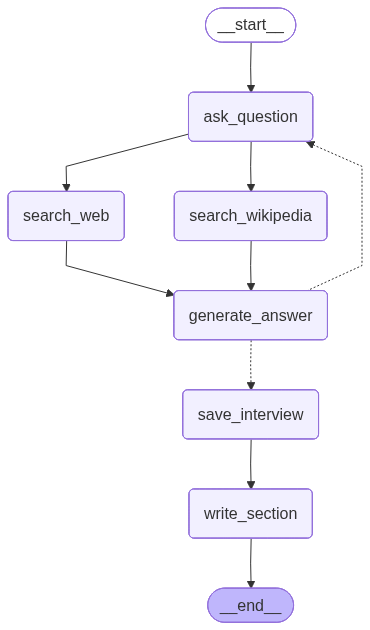

In [84]:
display(Image(interview_graph.get_graph().draw_mermaid_png()))

In [85]:
analyst

Analyst(name='Dr. Julian Lee', role='Tech Consultant', affiliation='Deloitte', description='Advisor on technology adoption and integration, motivated by the cost-benefit analysis and return on investment of adopting Langgraph over Autogen')

In [107]:
messages = [HumanMessage("So you said you were writing an article on langgraph?")]

In [108]:
thread = {"configurable": {"thread_id": "1"}}

In [109]:
interview = interview_graph.invoke({"analyst": analyst, "messages": messages, "max_num_turn": 2}, thread)

HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"


**************************************************
search_query='Langgraph vs Autogen cost-benefit analysis in technology adoption and integration'


HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
Retrying request to /openai/v1/chat/completions in 1.000000 seconds
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"


In [110]:
Markdown(interview['sections'][0])

## Understanding Messages in Communication
### Summary
Effective communication is crucial in various aspects of life, and understanding the concept of messages is essential in conveying information from a sender to a receiver. A message can be defined as a unit of communication that conveys information, and it can be transmitted through various forms such as spoken or written words, signals, or electronic data [1]. According to sources, messages can be categorized into primary, secondary, and auxiliary, with primary messages referring to the intentional content, both verbal and nonverbal [2]. Secondary messages, on the other hand, refer to the unintentional content, which can be influenced by factors such as physical attractiveness, age, gender, or ethnicity [2]. 

Here are some key sources that provide insights into the concept of messages:
1. [https://courses.lumenlearning.com/suny-hccc-businesscommunication/chapter/messages/](https://courses.lumenlearning.com/suny-hccc-businesscommunication/chapter/messages/)
2. [https://en.wikipedia.org/wiki/Message](https://en.wikipedia.org/wiki/Message)
3. [https://www.collinsdictionary.com/us/dictionary/english/message](https://www.collinsdictionary.com/us/dictionary/english/message)
4. [https://www.dictionary.com/browse/message](https://www.dictionary.com/browse/message)
5. [https://www.merriam-webster.com/dictionary/message](https://www.merriam-webster.com/dictionary/message)

Messages can be verbal or nonverbal, with verbal messages being exchanges of information using words, and nonverbal messages being communicated through actions or behaviors [1]. The structure of a message can be divided into five parts: attention statement, introduction, body, conclusion, and residual message [2]. Understanding the different types of messages and their structures is vital in effective communication, as it enables individuals to convey their intended meaning and avoid misinterpretation.

### Sources
[1] https://en.wikipedia.org/wiki/Message  
[2] https://courses.lumenlearning.com/suny-hccc-businesscommunication/chapter/messages/  
[3] https://www.collinsdictionary.com/us/dictionary/english/message  
[4] https://www.dictionary.com/browse/message  
[5] https://www.merriam-webster.com/dictionary/message

In [89]:
state = {"max_num_turns":2, "context":[], "analyst":analyst, "interview":"","section":[],"messages":[HumanMessage(content="Hi do proper search according to the expertise")]}

In [90]:
state

{'max_num_turns': 2,
 'context': [],
 'analyst': Analyst(name='Dr. Julian Lee', role='Tech Consultant', affiliation='Deloitte', description='Advisor on technology adoption and integration, motivated by the cost-benefit analysis and return on investment of adopting Langgraph over Autogen'),
 'interview': '',
 'section': [],
 'messages': [HumanMessage(content='Hi do proper search according to the expertise', additional_kwargs={}, response_metadata={})]}

In [91]:
generate_question(state)

HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"


{'messages': [AIMessage(content="Hello, my name is Ethan Thompson, and I'm a technology analyst. I'm excited to be speaking with Dr. Julian Lee, a renowned tech consultant from Deloitte, today. Dr. Lee, thank you for taking the time to share your expertise with me.\n\nI understand that you have extensive experience in advising on technology adoption and integration, with a focus on cost-benefit analysis and return on investment. Specifically, I'm interested in learning more about your thoughts on Langgraph versus Autogen. Can you tell me, what are some key differences between these two technologies that make one more attractive than the other from a cost-benefit perspective?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 131, 'prompt_tokens': 238, 'total_tokens': 369, 'completion_time': 0.360430995, 'prompt_time': 0.021217212, 'queue_time': 0.087956456, 'total_time': 0.381648207}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_9e1e8f

In [92]:
result = generate_question(state)

HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"


In [93]:
print(result["messages"][0].content)

Hello, my name is Ethan Kim, and I'm a technology analyst. I'm excited to be speaking with Dr. Julian Lee, a renowned tech consultant from Deloitte, today. Dr. Lee, thank you for taking the time to share your expertise with me.

I'd like to dive right into the topic of Langgraph and Autogen, as I understand you've had extensive experience advising on the adoption and integration of these technologies. Can you tell me, what specific factors do you consider when evaluating the cost-benefit analysis of adopting Langgraph over Autogen, and how do you determine the return on investment for your clients?


In [94]:
state = {"max_num_turns":2,"context":[],"analyst":analyst,"interview":"","section":[],'messages': [AIMessage(content="Hello, my name is Alex Thompson, and I'm an analyst interested in understanding the strategic implications of adopting Langgraph for businesses. I'm particularly keen on how this framework can drive innovation and support digital transformation initiatives. Thank you for taking the time to speak with me today, Michael. \n\nTo start, could you explain what Langgraph is and why it's becoming a significant consideration for businesses looking to innovate?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 79, 'prompt_tokens': 224, 'total_tokens': 303, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_cbf1785567', 'id': 'chatcmpl-CPRmMT7ufhFyYLhMtNpeguI9W2y6O', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--827b799b-ccb9-422c-a444-402d7ddc4550-0', usage_metadata={'input_tokens': 224, 'output_tokens': 79, 'total_tokens': 303, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}

In [95]:
result = search_web(state)

HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"


In [96]:
result["context"][0]

'<Document href="https://courses.lumenlearning.com/suny-hccc-businesscommunication/chapter/messages/"/>\nMessages are primary, secondary, and auxiliary. A message can be divided into a five-part structure composed of an attention statement, introduction, body, conclusion, and residual message.\n\n### EXERCISES [...] Primary messages refer to the intentional content, both verbal and nonverbal. These are the words or ways you choose to express yourself and communicate your message. For example, if you are sitting at your desk and a coworker stops by to ask you a question, you may say, “Here, have a seat.” These words are your primary message. [...] Secondary messages refer to the unintentional content, both verbal and nonverbal. Your audience will form impressions of your intentional messages, both negative and positive, over which you have no control. Perceptions of physical attractiveness, age, gender, or ethnicity or even simple mannerisms and patterns of speech may unintentionally in

In [97]:
print(result["context"][0])

<Document href="https://courses.lumenlearning.com/suny-hccc-businesscommunication/chapter/messages/"/>
Messages are primary, secondary, and auxiliary. A message can be divided into a five-part structure composed of an attention statement, introduction, body, conclusion, and residual message.

### EXERCISES [...] Primary messages refer to the intentional content, both verbal and nonverbal. These are the words or ways you choose to express yourself and communicate your message. For example, if you are sitting at your desk and a coworker stops by to ask you a question, you may say, “Here, have a seat.” These words are your primary message. [...] Secondary messages refer to the unintentional content, both verbal and nonverbal. Your audience will form impressions of your intentional messages, both negative and positive, over which you have no control. Perceptions of physical attractiveness, age, gender, or ethnicity or even simple mannerisms and patterns of speech may unintentionally influe

In [98]:
state = {"max_num_turns":2,"context":[],"analyst":analyst,"interview":"","section":[],'messages': [AIMessage(content="Hello, my name is Alex Thompson, and I'm an analyst interested in understanding the strategic implications of adopting Langgraph for businesses. I'm particularly keen on how this framework can drive innovation and support digital transformation initiatives. Thank you for taking the time to speak with me today, Michael. \n\nTo start, could you explain what Langgraph is and why it's becoming a significant consideration for businesses looking to innovate?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 79, 'prompt_tokens': 224, 'total_tokens': 303, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_cbf1785567', 'id': 'chatcmpl-CPRmMT7ufhFyYLhMtNpeguI9W2y6O', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--827b799b-ccb9-422c-a444-402d7ddc4550-0', usage_metadata={'input_tokens': 224, 'output_tokens': 79, 'total_tokens': 303, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}

In [99]:
result = search_wikipedia(state)

HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"


**************************************************
search_query='What is Langgraph and its significance for business innovation'


In [103]:
print(result["context"])

['']


In [104]:
search_docs = WikipediaLoader(query="Langgraph").load()

In [105]:
search_docs

[Document(metadata={'title': 'LangChain', 'summary': "LangChain is a software framework that helps facilitate the integration of large language models (LLMs) into applications. As a language model integration framework, LangChain's use-cases largely overlap with those of language models in general, including document analysis and summarization, chatbots, and code analysis.\n\n", 'source': 'https://en.wikipedia.org/wiki/LangChain'}, page_content='LangChain is a software framework that helps facilitate the integration of large language models (LLMs) into applications. As a language model integration framework, LangChain\'s use-cases largely overlap with those of language models in general, including document analysis and summarization, chatbots, and code analysis.\n\n\n== History ==\nLangChain was launched in October 2022 as an open source project by Harrison Chase, while working at machine learning startup Robust Intelligence. In April 2023, LangChain had incorporated and the new startu